# My Own Example:

In [1]:
import astropy.units as u
from foxsi_optics_calib.ccd.ccd import AndorCCDImage, AndorCCDPsfImage, AndorCCDPsfFitImage
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('dark')
sns.set_context('poster')

focal_length = 2 * u.m

f = '/Volumes/Storage/X10Test/data/kFOXSI3_X10-Test_CCD_T2Sx6_10kV_0p02mA_0mmZ.fits'
d = '/Volumes/Storage/X10Test/Dark1_FOXSI3_X10-Test_CCD_T2Sx6_10kV_0p02mA_+15mmZ.fits'

psf_img = AndorCCDPsfImage(f, d, focal_length)

Found 6 exposures. Averaging...


(<matplotlib.axes._subplots.WCSAxesSubplot at 0x117835cc0>,
 <matplotlib.contour.QuadContourSet at 0x1185803c8>)

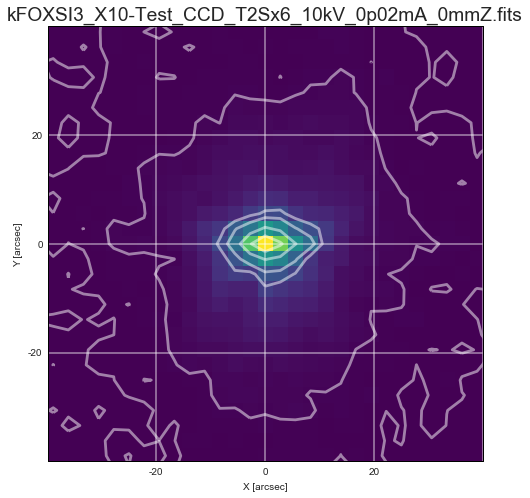

In [2]:
plt.figure(figsize=[8,8])
psf_img.plot_image()

In [3]:
hpd, hpd_array, d = psf_img.hpd()

Text(40,0.25,'HPD = 22.82 arcsec')

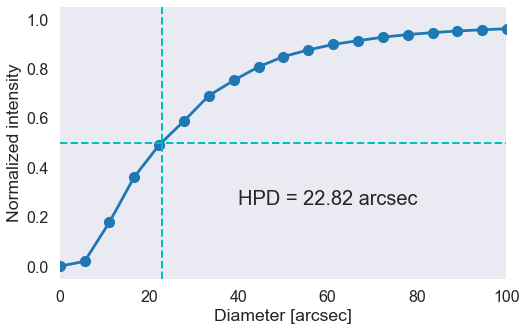

In [4]:
plt.figure(figsize=[8,5])
plt.plot(d,hpd_array,'o-')
plt.xlabel('Diameter [arcsec]')
plt.ylabel('Normalized intensity')
plt.axvline(hpd,color='c',linewidth=2, linestyle='dashed')
plt.axhline(0.5,color='c',linewidth=2, linestyle='dashed')
plt.xlim([0,100])
plt.text(40, 0.25,'HPD = '+"{:.2f}".format(hpd)+' arcsec',fontsize=20)

In [5]:
hpd

22.82200830459251

In [6]:
import foxsi_optics_calib

In [7]:
foxsi_optics_calib.plate_scale(focal_length)

<Quantity 2.784574884166638 arcsec>

# Make the 3 Gaussian fit funtion work for a testing Fits file

In [8]:
import astropy.units as u
from foxsi_optics_calib.ccd.ccd import AndorCCDPsfFitImage

focal_length = 2 * u.m

f = '/Volumes/Storage/X10Test/data/kFOXSI3_X10-Test_CCD_T2Sx6_10kV_0p02mA_0mmZ.fits'
d = '/Volumes/Storage/X10Test/Dark1_FOXSI3_X10-Test_CCD_T2Sx6_10kV_0p02mA_+15mmZ.fits'

psffit_img = AndorCCDPsfFitImage(f, d, focal_length)


Found 6 exposures. Averaging...
{'amplitude1': 36817.447992564441, 'amplitude2': 1683.5944721954411, 'amplitude3': 1744.2548571801879, 'x_stddev1': 1.5486405459600237, 'y_stddev1': 1.9192389840090687, 'x_stddev2': 8.2170559522149116, 'y_stddev2': 8.125216553833738, 'x_stddev3': 18.201458714514615, 'y_stddev3': 18.481266165115297, 'theta': 90.0}
Max location =  41044.2


/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/astropy/modeling/functional_models.py:373: RuntimeWarning: divide by zero encountered in true_divide
  a = 0.5 * ((cost2 / xstd2) + (sint2 / ystd2))
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/astropy/modeling/functional_models.py:374: RuntimeWarning: divide by zero encountered in true_divide
  b = 0.5 * ((sin2t / xstd2) - (sin2t / ystd2))
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/astropy/modeling/functional_models.py:375: RuntimeWarning: divide by zero encountered in true_divide
  c = 0.5 * ((sint2 / xstd2) + (cost2 / ystd2))
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/astropy/modeling/functional_models.py:376: RuntimeWarning: invalid value encountered in add
  return amplitude * np.exp(-((a * xdiff ** 2) + (b * xdiff * ydiff) +
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/astropy/modeling/functional_models.py:374: RuntimeWarning: invalid value encountered in subtract
  b = 0.5 * ((sin2t / x

Number of calls to function has reached maxfev = 200.
amplitude: 36908.2523342883 4056.041386386648 2049.301874690971
center: 1402.9791514708704, 593.5758531096152


In [9]:
psffit_img.calculate_fwhm()

array([ nan,  nan])

In [10]:
np.where(psffit_img.data == psffit_img.data.max())

(array([214]), array([504]))

In [16]:
psffit_img.data[np.where(psffit_img.data == psffit_img.data.max())]

array([ 41044.1640625], dtype=float32)

In [ ]:
psffit_img.wcs.wcs.

In [32]:
print('X_max = ',psffit_img.xaxis.to('arcsec').value[np.where(psffit_img.data == psffit_img.data.max())])
print('Y_max = ',psffit_img.yaxis.to('arcsec').value[np.where(psffit_img.data == psffit_img.data.max())])

X_max =  [ 1403.42574162]
Y_max =  [ 595.89902521]


In [ ]:
xaxis.to('arcsec').value

In [11]:
print('x_stddev1 = ',psffit_img.fit_func.x_stddev1)
print('x_stddev2 = ',psffit_img.fit_func.x_stddev2)
print('x_stddev3 = ',psffit_img.fit_func.x_stddev3)
print('y_stddev1 = ',psffit_img.fit_func.y_stddev1)
print('y_stddev2 = ',psffit_img.fit_func.y_stddev2)
print('y_stddev3 = ',psffit_img.fit_func.y_stddev3)

x_stddev1 =  Parameter('x_stddev1', value=1.722989730613973, bounds=(0, None))
x_stddev2 =  Parameter('x_stddev2', value=1.0748140647449878, bounds=(0, None))
x_stddev3 =  Parameter('x_stddev3', value=0.1787133057145823, bounds=(0, None))
y_stddev1 =  Parameter('y_stddev1', value=1.7229897262872984, bounds=(0, None))
y_stddev2 =  Parameter('y_stddev2', value=1.0748140508306259, bounds=(0, None))
y_stddev3 =  Parameter('y_stddev3', value=0.17871343423795724, bounds=(0, None))


In [17]:
psffit_img.fit_func.amplitude1+psffit_img.fit_func.amplitude2+psffit_img.fit_func.amplitude3

43013.595595365921

## Checking params.txt

In [13]:
import numpy as np
import astropy.units as u
from foxsi_optics_calib.psf import PSF2DModel
from astropy.modeling.fitting import LevMarLSQFitter


In [14]:
pitch = 0 * u.arcmin
yaw = 0 * u.arcmin
params_file = '/Users/Kamilobu/Desktop/foxsi_optics_calib/foxsi_optics_calib/params.txt'
params = np.loadtxt(params_file)
offaxis_angle = np.sqrt(pitch ** 2 + yaw ** 2)
polar_angle = np.arctan2(pitch, yaw) + np.pi / 2. * u.rad
poly_params = []
theta = polar_angle.to('deg').value
for g in params:
    #print(g)
    f = np.poly1d(g)
    poly_params.append(f(offaxis_angle.to('arcmin').value))

guess_params = {'amplitude1': poly_params[0], 'amplitude2': poly_params[1],
              'amplitude3': poly_params[2],
              'x_stddev1': poly_params[3], 'y_stddev1': poly_params[4],
              'x_stddev2': poly_params[5], 'y_stddev2': poly_params[6],
              'x_stddev3': poly_params[7], 'y_stddev3': poly_params[8],
              'theta': theta
              }
print(guess_params)

amplitude = psf_img.data.max()

g_init = PSF2DModel(amplitude1=amplitude, x_stddev1=3, y_stddev1=3,
                            amplitude2=amplitude / 10., x_stddev2=5, y_stddev2=5,
                            amplitude3=amplitude / 20., x_stddev3=10, y_stddev3=10,
                            x_mean=1406.2, y_mean=598.7,
                            theta=0, offset=0.0)

fit = LevMarLSQFitter()

{'amplitude1': 36817.447992564441, 'amplitude2': 1683.5944721954411, 'amplitude3': 1744.2548571801879, 'x_stddev1': 1.5486405459600237, 'y_stddev1': 1.9192389840090687, 'x_stddev2': 8.2170559522149116, 'y_stddev2': 8.125216553833738, 'x_stddev3': 18.201458714514615, 'y_stddev3': 18.481266165115297, 'theta': 90.0}


In [15]:
pitch = 0 * u.arcmin
yaw = 0 * u.arcmin
params_file = '/Users/Kamilobu/Desktop/foxsi_optics_calib/foxsi_optics_calib/params.txt'
params = np.loadtxt(params_file)
offaxis_angle = np.sqrt(pitch ** 2 + yaw ** 2)
polar_angle = np.arctan2(pitch, yaw) + np.pi / 2. * u.rad

amplitude = psf_img.data.max()

g_init = PSF2DModel(amplitude1=amplitude, x_stddev1=3, y_stddev1=3,
                            amplitude2=amplitude / 10., x_stddev2=5, y_stddev2=5,
                            amplitude3=amplitude / 20., x_stddev3=10, y_stddev3=10,
                            x_mean=1406.2, y_mean=598.7,
                            theta=0, offset=0.0)

fit = LevMarLSQFitter()

In [16]:
fitted_model = fit(g_init, psf_img.xaxis.to('arcsec').value,
                           psf_img.yaxis.to('arcsec').value, psf_img.data, maxiter=200)

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/astropy/modeling/functional_models.py:373: RuntimeWarning: divide by zero encountered in true_divide
  a = 0.5 * ((cost2 / xstd2) + (sint2 / ystd2))
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/astropy/modeling/functional_models.py:374: RuntimeWarning: divide by zero encountered in true_divide
  b = 0.5 * ((sin2t / xstd2) - (sin2t / ystd2))
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/astropy/modeling/functional_models.py:375: RuntimeWarning: divide by zero encountered in true_divide
  c = 0.5 * ((sint2 / xstd2) + (cost2 / ystd2))
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/astropy/modeling/functional_models.py:376: RuntimeWarning: invalid value encountered in add
  return amplitude * np.exp(-((a * xdiff ** 2) + (b * xdiff * ydiff) +
/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/astropy/modeling/functional_models.py:374: RuntimeWarning: invalid value encountered in subtract
  b = 0.5 * ((sin2t / x

In [18]:
print(fit.fit_info['message'])
print("amplitude: {0} {1} {2}".format(fitted_model.amplitude1.value,
                                              fitted_model.amplitude2.value,
                                              fitted_model.amplitude3.value))
print("center: {0}, {1}".format(fitted_model.x_mean.value,
                                        fitted_model.y_mean.value))
psf_img.fit_func = fitted_model
#psf_img.fwhm = psf_img.calculate_fwhm()


Number of calls to function has reached maxfev = 200.
amplitude: 36817.44799256444 1683.594472195441 1744.2548571801879
center: 1369.2063008407818, 311.9919149708726


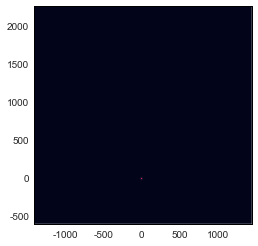

In [17]:
%matplotlib inline
ax = plt.subplot(projection=psf_img.wcs)
ax.imshow(psf_img.data,origin='low')

# Try fiting negative values of X and Y until kill the program !!!! 

In [18]:
psf_img.wcs.wcs.crpix

array([ 505.,  215.])

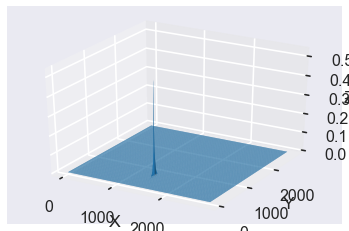

In [19]:
#%matplotlib qt 
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from foxsi_optics_calib.psf import psf2d

angle = 0.#(90 * u.deg).to('rad').value
amplitude = 1. #psf_img.data.max()
psf = psf2d(amplitude1=amplitude, x_stddev1=1, y_stddev1=1*5,
                       amplitude2=amplitude/10., x_stddev2=5, y_stddev2=5*5,
                       amplitude3=amplitude/20., x_stddev3=10, y_stddev3=10*5,
                       x_mean=1402, y_mean=597, theta=angle, offset=0.0)


fig = plt.figure()
ax = fig.gca(projection='3d')
X = psf_img.xaxis.to('arcsec').value
Y = psf_img.yaxis.to('arcsec').value
Z = psf(X,Y)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.9)
#cset = ax.contour(X, Y, Z, zdir='z', offset=-1.3, cmap=cm.coolwarm)
#cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
#cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
#ax.set_xlim(1200, 1600)
ax.set_ylabel('Y')
#ax.set_ylim(400, 800)
ax.set_zlabel('Z')
#ax.set_zlim(-1.3, 1.3)

plt.show()

(1024, 1024)

In [20]:
2843*505/1024

1402.0654296875

In [30]:
print('Xmax = ',psf_img.wcs.wcs.crpix[0]*foxsi_optics_calib.plate_scale(focal_length).value)
print('Ymax = ',psf_img.wcs.wcs.crpix[1]*foxsi_optics_calib.plate_scale(focal_length).value)

Xmax =  1406.2103165
Ymax =  598.683600096
